# EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.shape, test_data.shape

((39211, 16), (10000, 15))

In [4]:
train_data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [5]:
test_data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [7]:
train_data.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [8]:
column_names = list(train_data.columns)
column_names

['last contact date',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'target']

In [9]:
# Print Unique values in each column
for x in column_names:
    print("================================================================================")
    print(f"{x}: ", train_data[x].unique())

last contact date:  ['2009-04-17' '2009-10-11' '2010-11-20' ... '2009-07-05' '2008-02-25'
 '2010-04-12']
age:  [26 52 44 33 31 25 46 37 38 32 28 34 86 42 58 39 35 47 45 48 30 50 56 54
 40 53 41 51 27 29 57 63 36 43 19 55 49 23 83 60 22 80 76 59 24 93 71 89
 64 68 85 79 62 69 20 90 66 87 72 88 67 70 77 91 78 61 65 73 74 84 82 92
 81 18 21 75 94 95]
job:  ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan]
marital:  ['married' 'single' 'divorced']
education:  ['secondary' 'tertiary' 'primary' nan]
default:  ['no' 'yes']
balance:  [  647   553  1397 ...  4307  6187 38594]
housing:  ['yes' 'no']
loan:  ['no' 'yes']
contact:  ['cellular' 'telephone' nan]
duration:  [ 357  160  326 ... 3506 4144 1631]
campaign:  [ 2  1  3  4  6 45  5 44 12 61 58  7  8 20 43 17 13 15 48 34 11 54 22 26
 29 21 10 49  9 52 53 57 16 50 46 47 23 37 18 38 32 36 39 56 14 30 41 63
 51 28 25 62 55 42 35 31 59 19 40 33 24 27 60]

In [10]:
# Separate Features and Labels
X = train_data.drop('target', axis=1)
y = train_data['target']

### Imputing

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
# Copy train data in df
df = X.copy()

In [13]:
# Manually Replaced -1 with np.nan
df['pdays'] = df['pdays'].replace(-1, np.nan)

In [14]:
# Imputed using Simple Imputer with strategy
pdays_imputer = SimpleImputer(strategy='median')
job_imputer = SimpleImputer(strategy='most_frequent')
education_imputer = SimpleImputer(strategy='most_frequent')
contact_imputer = SimpleImputer(strategy='most_frequent')
poutcome_imputer = SimpleImputer(strategy='most_frequent')

df['pdays'] = pdays_imputer.fit_transform(df[['pdays']])
df['job'] = job_imputer.fit_transform(df[['job']]).flatten()
df['education'] = education_imputer.fit_transform(df[['education']]).flatten()
df['contact'] = contact_imputer.fit_transform(df[['contact']]).flatten()
df['poutcome'] = poutcome_imputer.fit_transform(df[['poutcome']]).flatten()

### Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
cols = list(df.columns)

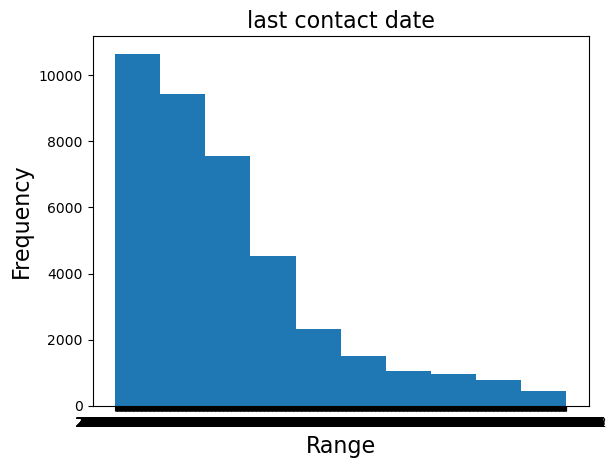

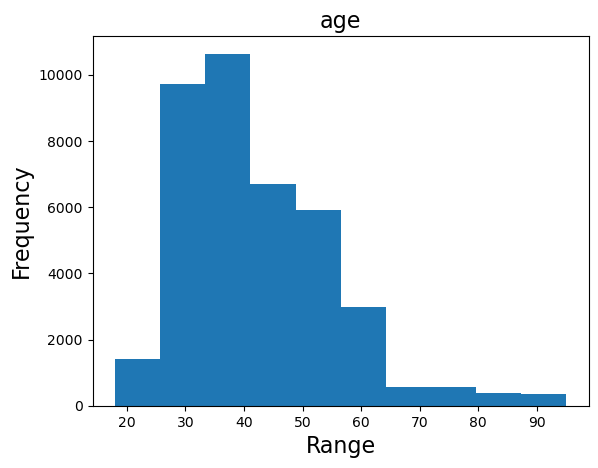

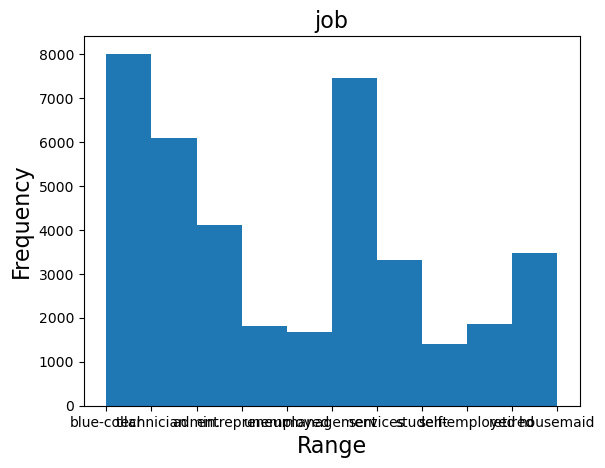

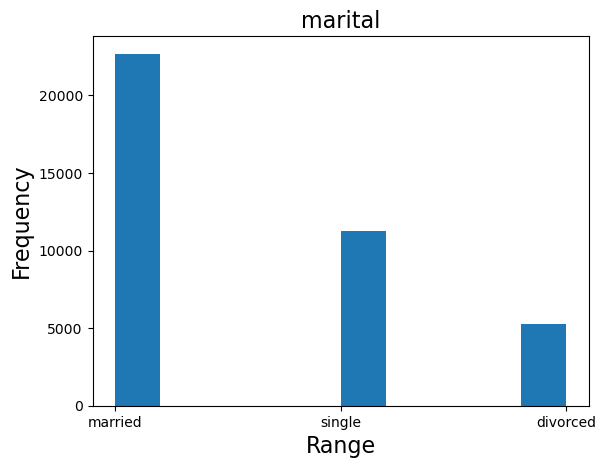

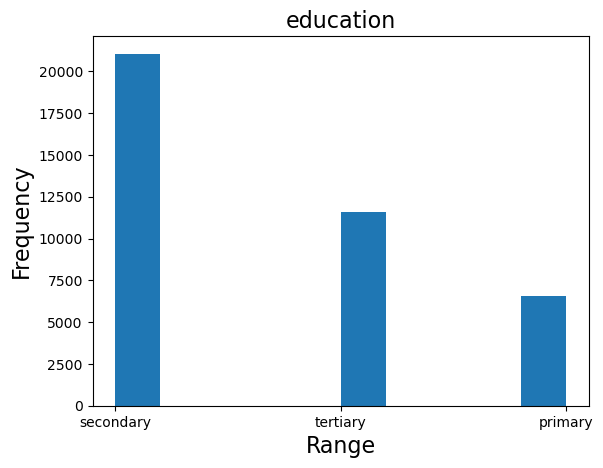

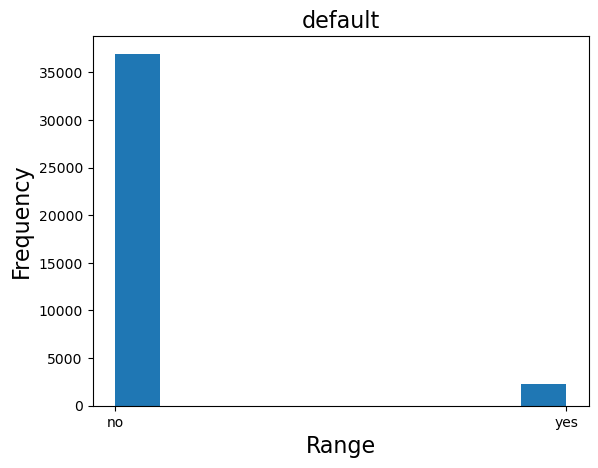

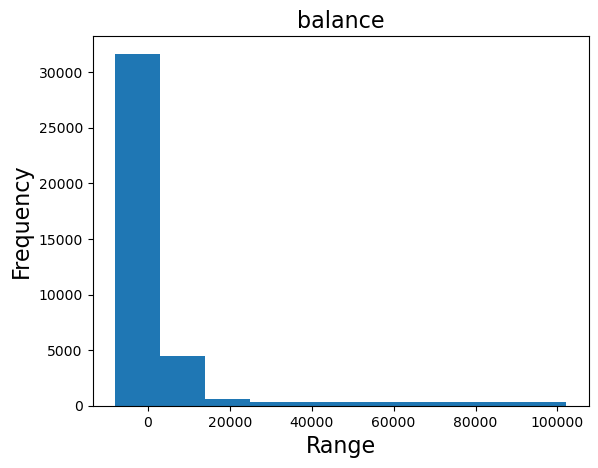

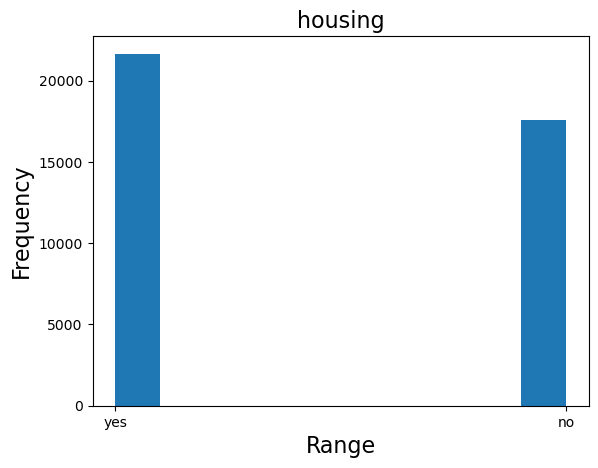

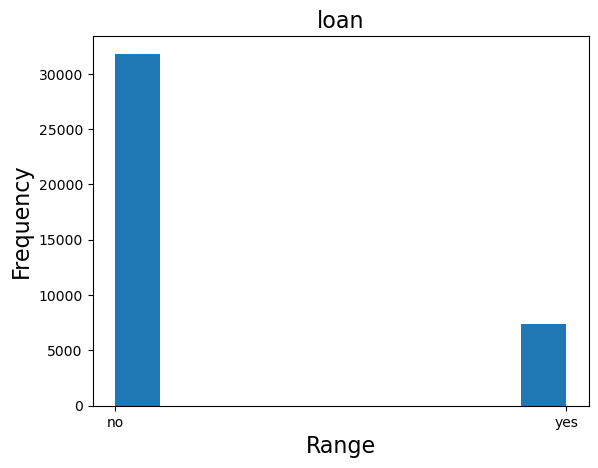

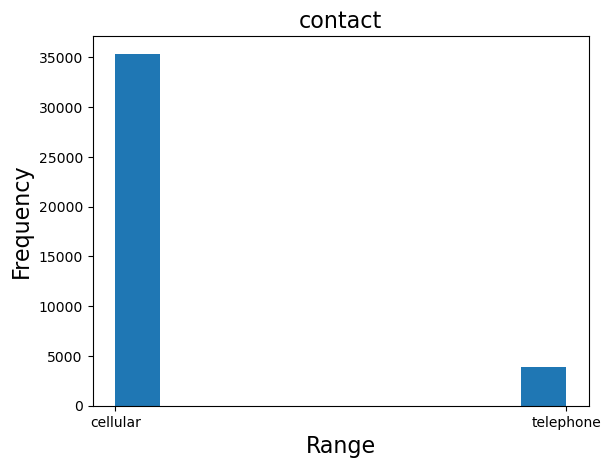

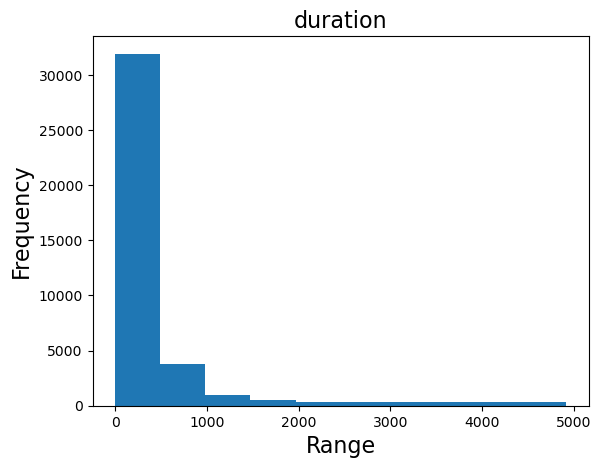

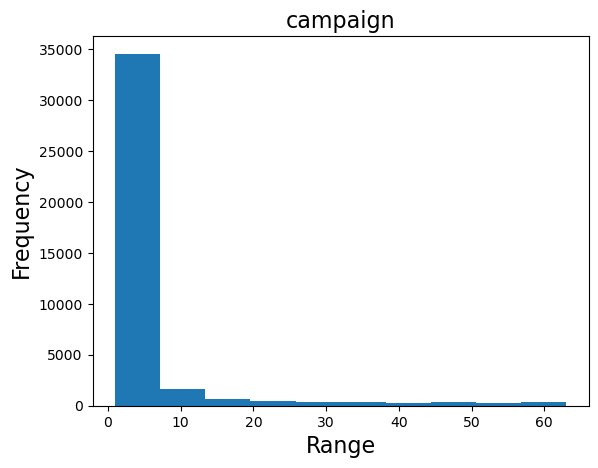

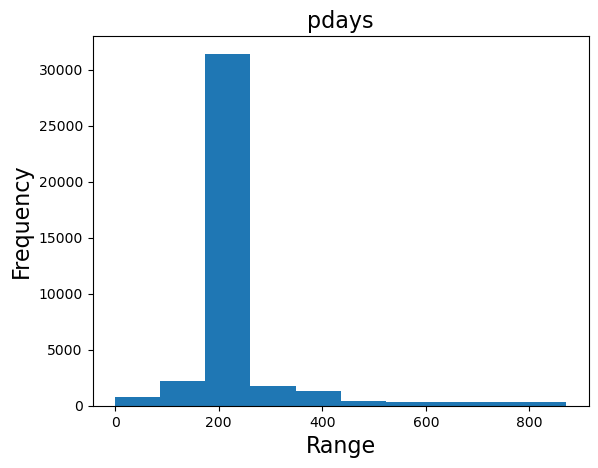

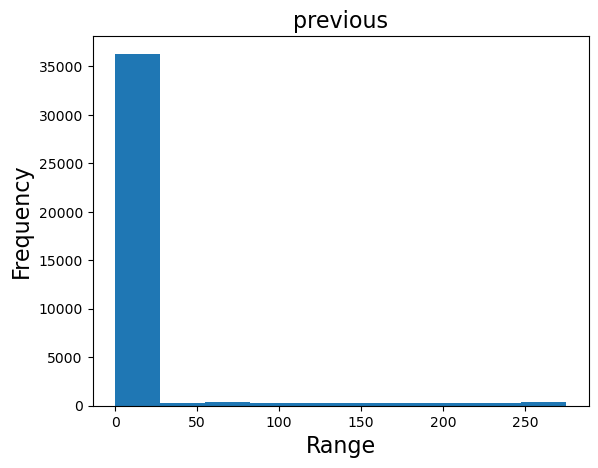

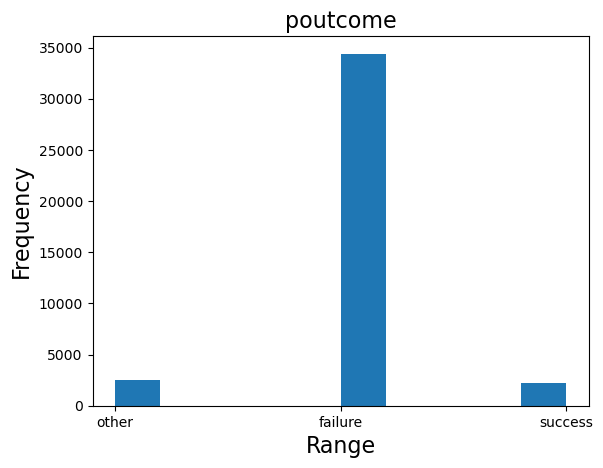

In [17]:
# histograms of all columns
for name in cols[0:len(cols)]:
    plt.hist(df[name].values)
    plt.title(name,fontsize=16)
    plt.xlabel('Range',fontsize=16)
    plt.ylabel('Frequency',fontsize=16)
    plt.show()

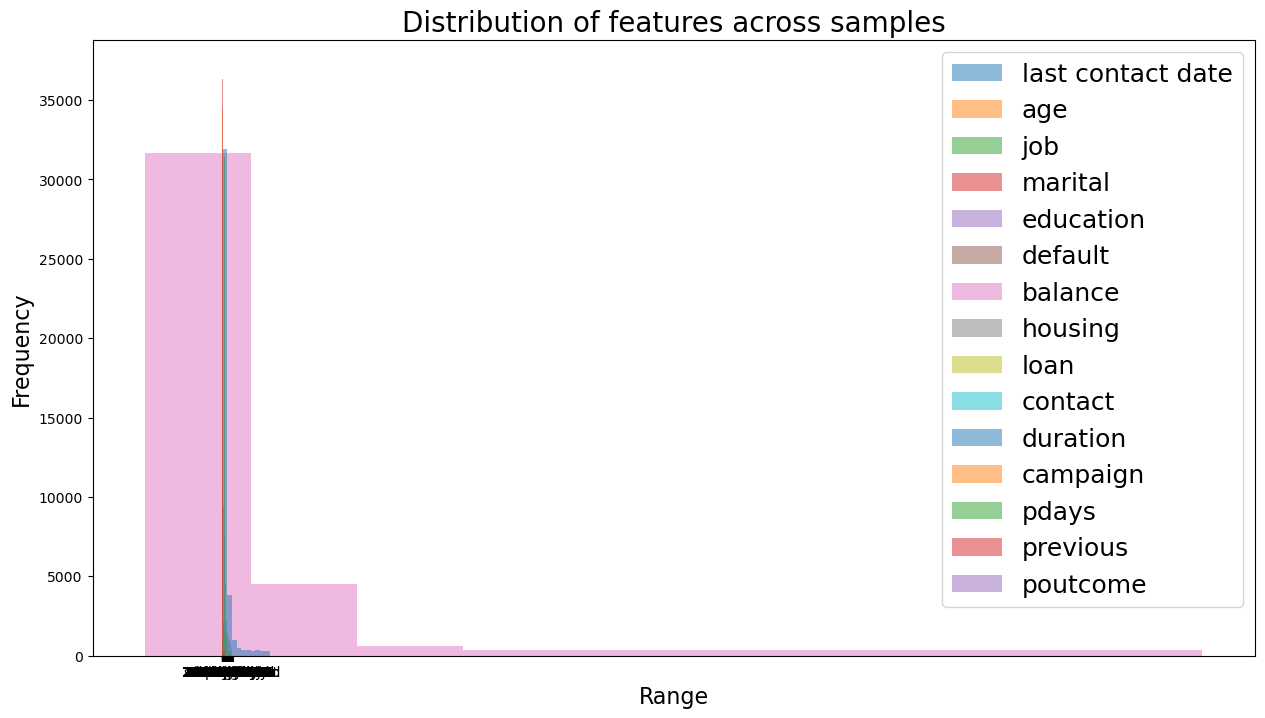

In [18]:
# Histogram of all columns combined
plt.figure(figsize=(15,8))

for colname in df:
    plt.hist(df[colname].values, alpha=0.5)


plt.legend(cols, fontsize=18,loc="upper right",frameon=True)
plt.title('Distribution of features across samples',fontsize=20)
plt.xlabel('Range',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

plt.show()

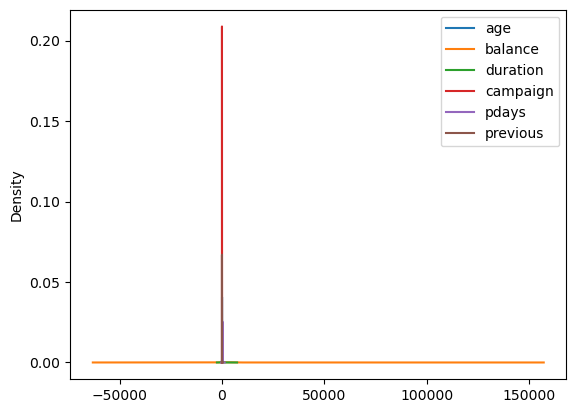

In [19]:
# KDE plot before scaling
ax = df.plot.kde()

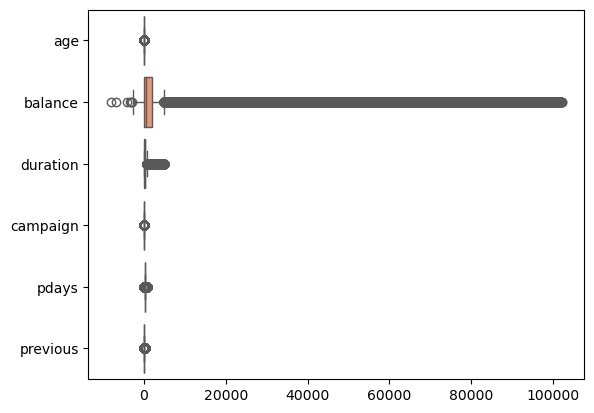

In [20]:
# Boxplot before scaling
ax = sns.boxplot(data=df, orient="h", palette="Set2")

/tmp/ipykernel_145517/753393276.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(data=df, orient="h", palette="Set2",  scale="width")


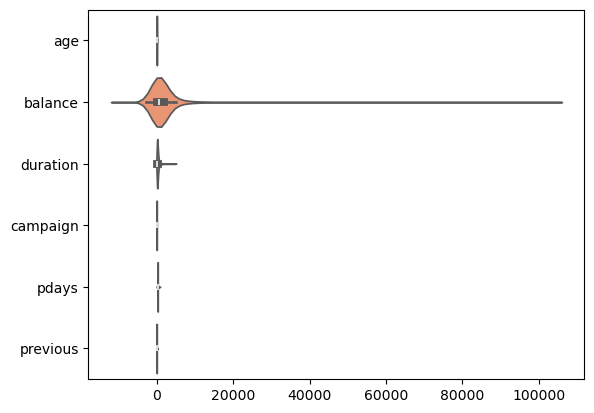

In [21]:
# Violinplot after scaling
ax = sns.violinplot(data=df, orient="h", palette="Set2",  scale="width")

In [22]:
# Check values in balance column
df.balance.sort_values()[:5]

12327   -8019
20891   -6847
23304   -4057
25480   -3313
5926    -3058
Name: balance, dtype: int64

### Scale Numerical Columns

In [23]:
# Scaling Numeric Columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols =['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
X_numerical_scaled = scaler.fit_transform(df[numerical_cols])
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_cols)

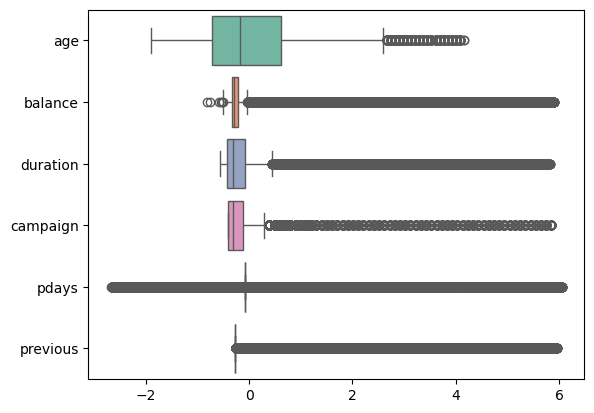

In [24]:
# Boxplot after scaling
ax = sns.boxplot(data=X_numerical_scaled, orient="h", palette="Set2")

/tmp/ipykernel_145517/889517159.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(data=X_numerical_scaled, orient="h", palette="Set2",  scale="width")


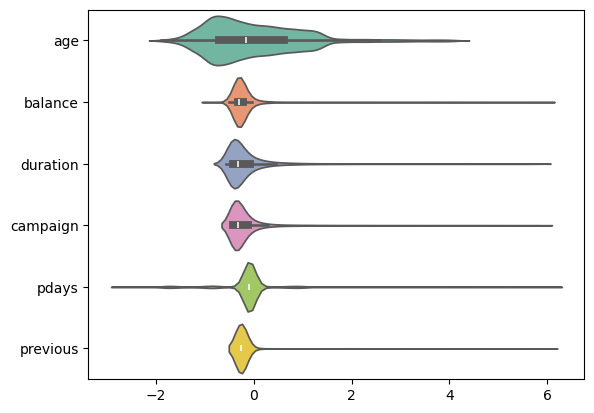

In [25]:
# Violinplot after scaling
ax = sns.violinplot(data=X_numerical_scaled, orient="h", palette="Set2",  scale="width")

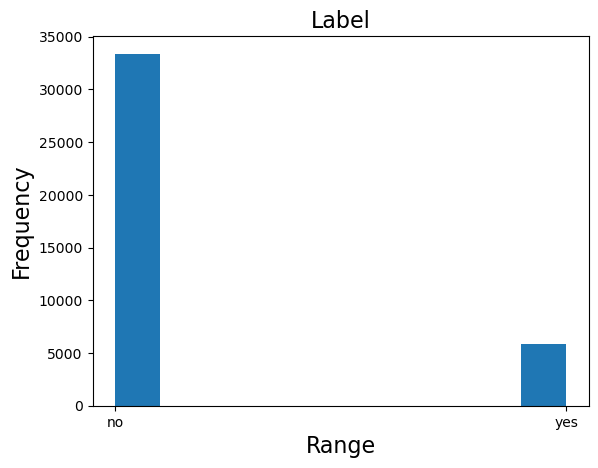

In [26]:
# Imbalance in Labels
plt.hist(y)
plt.title('Label',fontsize=16)
plt.xlabel('Range',fontsize=16)
plt.ylabel('Frequency',fontsize=16)
plt.show()

### Encoding Categorical Columns

In [27]:
# Extracting year, month, day from last contact date column
df['date'] = pd.to_datetime(df['last contact date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day of week'] = df['date'].dt.dayofweek                                             # 0=Monday, 6=Sunday
df['is weekend'] = df['day of week'].apply(lambda x: 1 if x >= 5 else 0)                # checks sat, sun

# drop last contact date and date column
df = df.drop(columns=['last contact date', 'date'])

In [28]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'year', 'month', 'day', 'day of week', 'is weekend'],
      dtype='object')

In [29]:
# label encoder for target labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [30]:
# ordinal encoder for education column
from sklearn.preprocessing import OrdinalEncoder
categories_order = [['primary', 'secondary', 'tertiary']]
encoder = OrdinalEncoder(categories=categories_order)

X_education_encoded = encoder.fit_transform(df['education'].to_numpy().reshape(-1,1))
X_education_encoded = pd.DataFrame(X_education_encoded)

In [31]:
# one hot encoder for other categorical data
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(sparse_output=False)

columns_np = df[['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'year', 'month', 'day', 'day of week', 'is weekend']].to_numpy()
X_categorical_encoded = onehot_enc.fit_transform(columns_np)
X_categorical_encoded = pd.DataFrame(X_categorical_encoded)

### Few Insights

In [32]:
# check distribution of each feature using histogram
# check unique categories in each feature
# most of the numerical features have most density in fraction of their large range, so feature scaling
# balance feature have many outliers, and it also have negative values
# imbalanced labels
# can extract more info from 'last contact date' column
# education column have ordinal data
# need to encode label data

### Combined Processed Numerical and Categorical Data

In [33]:
X_processed = pd.concat([X_numerical_scaled, X_categorical_encoded, X_education_encoded], axis=1)

### Feature Selection

In [34]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0.1)
data_new = vt.fit_transform(X_processed.to_numpy())

In [35]:
X_processed.shape

(39211, 87)

In [36]:
data_new.shape

(39211, 31)

### Split train_test

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new, y, test_size=0.2, random_state=42)

### Dummy Classifier

In [38]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
model = dummy.fit(X_train,y_train)

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.45865543898398675